# Experimenting with 2D rotation matrix

<ipython-input-32-7092874a1f1b>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(test_image.shape[0])):


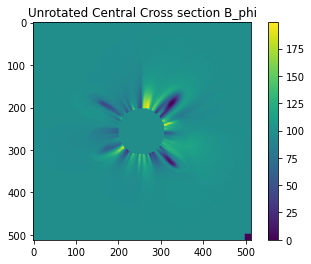

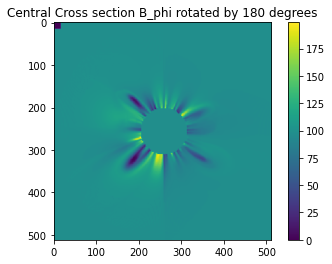

In [32]:
test_image = np.array(Image.open('/Users/crura/Desktop/Research/Magnetic_Field/eclipse2017_mhd_final/Central_Cross_Section_B_phi.png'))


theta = np.radians(180)
theta_print = round(theta * (180/np.pi))

c, s = np.cos(theta), np.sin(theta)

R = np.array(((c, -s), (s, c)))

test_image_new = np.zeros(test_image.shape)
for i in tqdm_notebook(range(test_image.shape[0])):
    for j in range(test_image.shape[1]):
        try:
            inew,jnew = round(np.matmul(R,(i,j))[0]), round(np.matmul(R,(i,j))[1])
            test_image_new[inew][jnew] = test_image[i][j] 
        except IndexError:
            pass
        

        
plt.imshow(test_image)
plt.title('Unrotated Central Cross section B_phi')
plt.colorbar()
plt.show()
plt.close()

plt.imshow(test_image_new)
plt.title('Central Cross section B_phi rotated by {} degrees'.format(theta_print))
plt.colorbar()
plt.show()
plt.close()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def plot_cube(cube_definition):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor((0,0,1,0.1))

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('auto')

# Rotate cube by 90 degrees in x direction

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25


[(0.0, 0.0, 0.0),
 (0.0, 6.123233995736766e-17, 1.0),
 (0.5, 0.0, 0.0),
 (0.0, -0.5, 3.061616997868383e-17)]

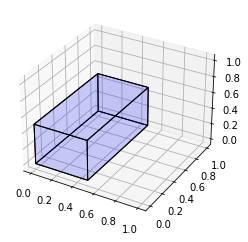

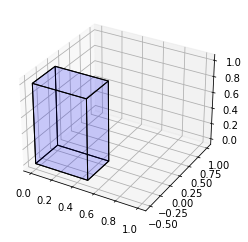

In [5]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook

theta = np.radians(90)
c = np.cos(theta)
s = np.sin(theta)
# Define x rotation matrix
R3x = np.zeros((3,3))
R3x[0] = [1,0,0]
R3x[1] = [0,c,-s]
R3x[2] = [0,s,c]
#R3x
# Define y rotation matrix
R3y = np.zeros((3,3))
R3y[0] = [c,0,s]
R3y[1] = [0,1,0]
R3y[2] = [-s,0,c]
#R3y
# Define z rotation matrix
R3z = np.zeros((3,3))
R3z[0] = [c,-s,0]
R3z[1] = [s,c,0]
R3z[2] = [0,0,1]




cube_definition = [
    (0,0,0), (0,1,0), (0.5,0,0), (0,0,0.5)
]

cornerlist = []
rot_cube_def = np.zeros((4,3))
for i in range(0,len(cube_definition)):
    corner = np.array(cube_definition[i])
    
    rotated_corner = np.matmul(R3x,corner)
    rot_cube_def[i][0] = rotated_corner[0]
    rot_cube_def[i][1] = rotated_corner[1]
    rot_cube_def[i][2] = rotated_corner[2]
    
    cornerlist.append((rotated_corner[0],rotated_corner[1],rotated_corner[2]))

    
try:
    plot_cube(cube_definition)
except NotImplementedError:
    pass

try:
    plot_cube(cornerlist)
except NotImplementedError:
    pass


# check to see if volume is retained with transformation
length = np.sqrt((cube_definition[0][0] - cube_definition[1][0])**2 + (cube_definition[0][1] - cube_definition[1][1])**2 + (cube_definition[0][2] - cube_definition[1][2])**2)
width = np.sqrt((cube_definition[0][0] - cube_definition[2][0])**2 + (cube_definition[0][1] - cube_definition[2][1])**2 + (cube_definition[0][2] - cube_definition[2][2])**2)
height = np.sqrt((cube_definition[0][0] - cube_definition[3][0])**2 + (cube_definition[0][1] - cube_definition[3][1])**2 + (cube_definition[0][2] - cube_definition[3][2])**2)
vol_1 = length * width * height

length2 = np.sqrt((cornerlist[0][0] - cornerlist[1][0])**2 + (cornerlist[0][1] - cornerlist[1][1])**2 + (cornerlist[0][2] - cornerlist[1][2])**2)
width2 = np.sqrt((cornerlist[0][0] - cornerlist[2][0])**2 + (cornerlist[0][1] - cornerlist[2][1])**2 + (cornerlist[0][2] - cornerlist[2][2])**2)
height2 = np.sqrt((cornerlist[0][0] - cornerlist[3][0])**2 + (cornerlist[0][1] - cornerlist[3][1])**2 + (cornerlist[0][2] - cornerlist[3][2])**2)
vol_2 = length2 * width2 * height2

print('dimensions of original cube: length: {}, width: {}, height: {}, volume: {}'.format(length,width,height,vol_1))
print('dimensions of rotated cube: length: {}, width: {}, height: {}, volume: {}'.format(length2,width2,height2,vol_2))
#cornerlist



# Rotate cube by 90 degrees in y direction

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25


([(0, 0, 0), (0, 1, 0), (0.5, 0, 0), (0, 0, 0.5)],
 [(0.0, 0.0, 0.0),
  (0.0, 1.0, 0.0),
  (3.061616997868383e-17, 0.0, -0.5),
  (0.5, 0.0, 3.061616997868383e-17)])

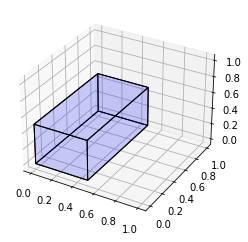

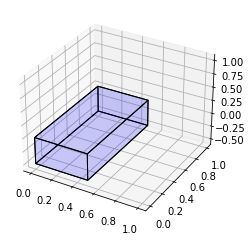

In [8]:
theta = np.radians(90)
c = np.cos(theta)
s = np.sin(theta)
# Define x rotation matrix
R3x = np.zeros((3,3))
R3x[0] = [1,0,0]
R3x[1] = [0,c,-s]
R3x[2] = [0,s,c]
#R3x
# Define y rotation matrix
R3y = np.zeros((3,3))
R3y[0] = [c,0,s]
R3y[1] = [0,1,0]
R3y[2] = [-s,0,c]
#R3y
# Define z rotation matrix
R3z = np.zeros((3,3))
R3z[0] = [c,-s,0]
R3z[1] = [s,c,0]
R3z[2] = [0,0,1]




cube_definition = [
    (0,0,0), (0,1,0), (0.5,0,0), (0,0,0.5)
]

cornerlist = []
rot_cube_def = np.zeros((4,3))
for i in range(0,len(cube_definition)):
    corner = np.array(cube_definition[i])
    
    rotated_corner = np.matmul(R3y,corner)
    rot_cube_def[i][0] = rotated_corner[0]
    rot_cube_def[i][1] = rotated_corner[1]
    rot_cube_def[i][2] = rotated_corner[2]
    
    cornerlist.append((rotated_corner[0],rotated_corner[1],rotated_corner[2]))

    
try:
    plot_cube(cube_definition)
except NotImplementedError:
    pass

try:
    plot_cube(cornerlist)
except NotImplementedError:
    pass


# check to see if volume is retained with transformation
length = np.sqrt((cube_definition[0][0] - cube_definition[1][0])**2 + (cube_definition[0][1] - cube_definition[1][1])**2 + (cube_definition[0][2] - cube_definition[1][2])**2)
width = np.sqrt((cube_definition[0][0] - cube_definition[2][0])**2 + (cube_definition[0][1] - cube_definition[2][1])**2 + (cube_definition[0][2] - cube_definition[2][2])**2)
height = np.sqrt((cube_definition[0][0] - cube_definition[3][0])**2 + (cube_definition[0][1] - cube_definition[3][1])**2 + (cube_definition[0][2] - cube_definition[3][2])**2)
vol_1 = length * width * height

length2 = np.sqrt((cornerlist[0][0] - cornerlist[1][0])**2 + (cornerlist[0][1] - cornerlist[1][1])**2 + (cornerlist[0][2] - cornerlist[1][2])**2)
width2 = np.sqrt((cornerlist[0][0] - cornerlist[2][0])**2 + (cornerlist[0][1] - cornerlist[2][1])**2 + (cornerlist[0][2] - cornerlist[2][2])**2)
height2 = np.sqrt((cornerlist[0][0] - cornerlist[3][0])**2 + (cornerlist[0][1] - cornerlist[3][1])**2 + (cornerlist[0][2] - cornerlist[3][2])**2)
vol_2 = length2 * width2 * height2

print('dimensions of original cube: length: {}, width: {}, height: {}, volume: {}'.format(length,width,height,vol_1))
print('dimensions of rotated cube: length: {}, width: {}, height: {}, volume: {}'.format(length2,width2,height2,vol_2))
#cube_definition, cornerlist



# Rotate cube by 90 degrees in z direction

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25


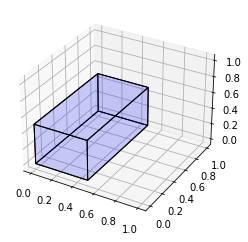

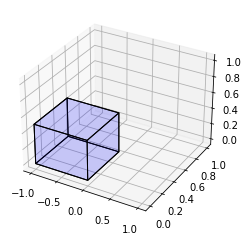

In [9]:
theta = np.radians(90)
c = np.cos(theta)
s = np.sin(theta)
# Define x rotation matrix
R3x = np.zeros((3,3))
R3x[0] = [1,0,0]
R3x[1] = [0,c,-s]
R3x[2] = [0,s,c]
#R3x
# Define y rotation matrix
R3y = np.zeros((3,3))
R3y[0] = [c,0,s]
R3y[1] = [0,1,0]
R3y[2] = [-s,0,c]
#R3y
# Define z rotation matrix
R3z = np.zeros((3,3))
R3z[0] = [c,-s,0]
R3z[1] = [s,c,0]
R3z[2] = [0,0,1]




cube_definition = [
    (0,0,0), (0,1,0), (0.5,0,0), (0,0,0.5)
]

cornerlist = []
rot_cube_def = np.zeros((4,3))
for i in range(0,len(cube_definition)):
    corner = np.array(cube_definition[i])
    
    rotated_corner = np.matmul(R3z,corner)
    rot_cube_def[i][0] = rotated_corner[0]
    rot_cube_def[i][1] = rotated_corner[1]
    rot_cube_def[i][2] = rotated_corner[2]
    
    cornerlist.append((rotated_corner[0],rotated_corner[1],rotated_corner[2]))

    
try:
    plot_cube(cube_definition)
except NotImplementedError:
    pass

try:
    plot_cube(cornerlist)
except NotImplementedError:
    pass


# check to see if volume is retained with transformation
length = np.sqrt((cube_definition[0][0] - cube_definition[1][0])**2 + (cube_definition[0][1] - cube_definition[1][1])**2 + (cube_definition[0][2] - cube_definition[1][2])**2)
width = np.sqrt((cube_definition[0][0] - cube_definition[2][0])**2 + (cube_definition[0][1] - cube_definition[2][1])**2 + (cube_definition[0][2] - cube_definition[2][2])**2)
height = np.sqrt((cube_definition[0][0] - cube_definition[3][0])**2 + (cube_definition[0][1] - cube_definition[3][1])**2 + (cube_definition[0][2] - cube_definition[3][2])**2)
vol_1 = length * width * height

length2 = np.sqrt((cornerlist[0][0] - cornerlist[1][0])**2 + (cornerlist[0][1] - cornerlist[1][1])**2 + (cornerlist[0][2] - cornerlist[1][2])**2)
width2 = np.sqrt((cornerlist[0][0] - cornerlist[2][0])**2 + (cornerlist[0][1] - cornerlist[2][1])**2 + (cornerlist[0][2] - cornerlist[2][2])**2)
height2 = np.sqrt((cornerlist[0][0] - cornerlist[3][0])**2 + (cornerlist[0][1] - cornerlist[3][1])**2 + (cornerlist[0][2] - cornerlist[3][2])**2)
vol_2 = length2 * width2 * height2

print('dimensions of original cube: length: {}, width: {}, height: {}, volume: {}'.format(length,width,height,vol_1))
print('dimensions of rotated cube: length: {}, width: {}, height: {}, volume: {}'.format(length2,width2,height2,vol_2))
#cube_definition, cornerlist

# Now, define yaw, pitch, and roll rotation

yaw (z) angle: 5
pitch (y) angle: 90
roll (x) angle: 87
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.5, height: 0.49999999999999994, volume: 0.24999999999999994


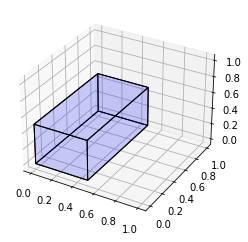

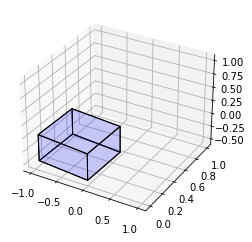

In [38]:

theta_roll = np.radians(np.float(input('yaw (z) angle: ')))

c_roll = np.cos(theta_roll)
s_roll = np.sin(theta_roll)
# Define roll rotation matrix
R3roll = np.zeros((3,3))
R3roll[0] = [1,0,0]
R3roll[1] = [0,c_roll,-s_roll]
R3roll[2] = [0,s_roll,c_roll]


theta_pitch = np.radians(np.float(input('pitch (y) angle: ')))

c_pitch = np.cos(theta_pitch)
s_pitch = np.sin(theta_pitch)
# Define pitch rotation matrix
R3pitch = np.zeros((3,3))
R3pitch[0] = [c_pitch,0,s_pitch]
R3pitch[1] = [0,1,0]
R3pitch[2] = [-s_pitch,0,c_pitch]

theta_yaw = np.radians(np.float(input('roll (x) angle: ')))

c_yaw = np.cos(theta_yaw)
s_yaw = np.sin(theta_yaw)

# Define yaw rotation matrix
R3yaw = np.zeros((3,3))
R3yaw[0] = [c_yaw,-s_yaw,0]
R3yaw[1] = [s_yaw,c_yaw,0]
R3yaw[2] = [0,0,1]

R3 = np.matmul(R3yaw,R3pitch,R3roll)




cube_definition = [
    (0,0,0), (0,1,0), (0.5,0,0), (0,0,0.5)
]

cornerlist = []
rot_cube_def = np.zeros((4,3))
for i in range(0,len(cube_definition)):
    corner = np.array(cube_definition[i])
    
    rotated_corner = np.matmul(R3,corner)
    rot_cube_def[i][0] = rotated_corner[0]
    rot_cube_def[i][1] = rotated_corner[1]
    rot_cube_def[i][2] = rotated_corner[2]
    
    cornerlist.append((rotated_corner[0],rotated_corner[1],rotated_corner[2]))

    
try:
    plot_cube(cube_definition)
except NotImplementedError:
    pass

try:
    plot_cube(cornerlist)
    plt.savefig('testrotate.png')
except NotImplementedError:
    pass


# check to see if volume is retained with transformation
length = np.sqrt((cube_definition[0][0] - cube_definition[1][0])**2 + (cube_definition[0][1] - cube_definition[1][1])**2 + (cube_definition[0][2] - cube_definition[1][2])**2)
width = np.sqrt((cube_definition[0][0] - cube_definition[2][0])**2 + (cube_definition[0][1] - cube_definition[2][1])**2 + (cube_definition[0][2] - cube_definition[2][2])**2)
height = np.sqrt((cube_definition[0][0] - cube_definition[3][0])**2 + (cube_definition[0][1] - cube_definition[3][1])**2 + (cube_definition[0][2] - cube_definition[3][2])**2)
vol_1 = length * width * height

length2 = np.sqrt((cornerlist[0][0] - cornerlist[1][0])**2 + (cornerlist[0][1] - cornerlist[1][1])**2 + (cornerlist[0][2] - cornerlist[1][2])**2)
width2 = np.sqrt((cornerlist[0][0] - cornerlist[2][0])**2 + (cornerlist[0][1] - cornerlist[2][1])**2 + (cornerlist[0][2] - cornerlist[2][2])**2)
height2 = np.sqrt((cornerlist[0][0] - cornerlist[3][0])**2 + (cornerlist[0][1] - cornerlist[3][1])**2 + (cornerlist[0][2] - cornerlist[3][2])**2)
vol_2 = length2 * width2 * height2

print('dimensions of original cube: length: {}, width: {}, height: {}, volume: {}'.format(length,width,height,vol_1))
print('dimensions of rotated cube: length: {}, width: {}, height: {}, volume: {}'.format(length2,width2,height2,vol_2))
#cube_definition, cornerlist

In [10]:

np.matmul(R3x,R3y,R3z)

array([[ 6.12323400e-17,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  6.12323400e-17, -6.12323400e-17],
       [-6.12323400e-17,  1.00000000e+00,  3.74939946e-33]])

In [14]:
np.float(input('yaw (z) angle: '))

yaw angle: 30


30.0

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
d

<ipython-input-2-2e967cebc27e>:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, widt

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999994
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.49999999999999994, volume: 0.24999999999999997
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, widt

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.4999999999999

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999994
dimensions of original cube: lengt

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999994
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999994
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.5, volume: 0.24999999999999997
dimensions of orig

dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.5, volume: 0.24999999999999997
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 1.0, width: 0.49999999999999994, height: 0.5, volume: 0.24999999999999997
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of original cube: length: 1.0, width: 0.5, height: 0.5, volume: 0.25
dimensions of rotated cube: length: 0.9999999999999999, width: 0.49999999999999994, height: 0.49999999999999994, volume: 0.24999999999999992
dimensions of origi

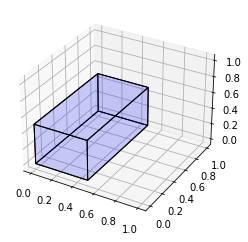

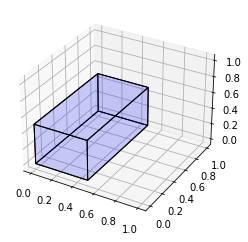

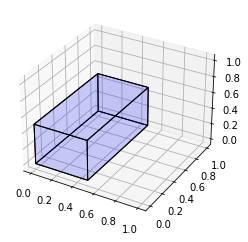

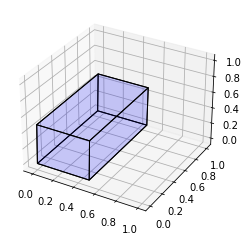

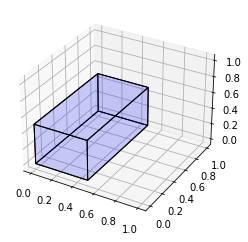

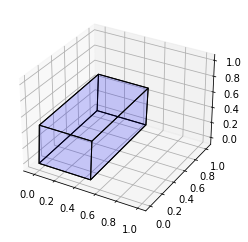

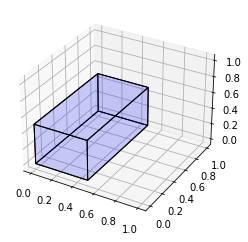

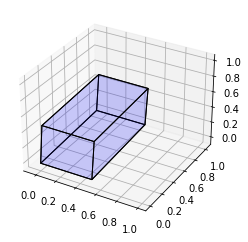

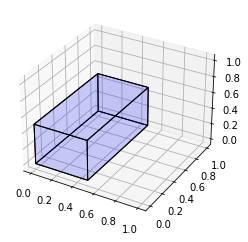

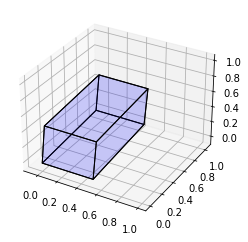

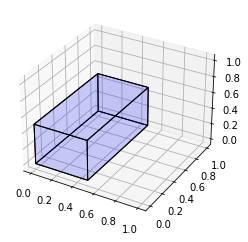

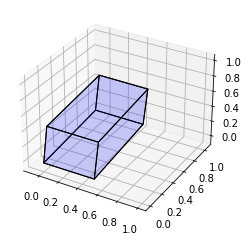

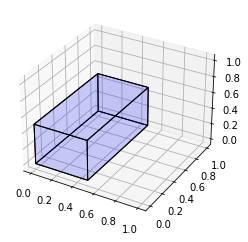

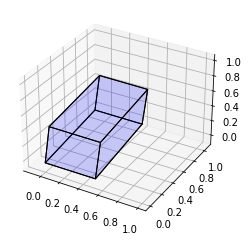

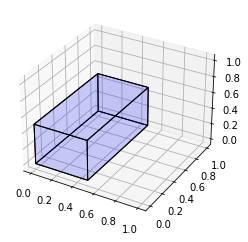

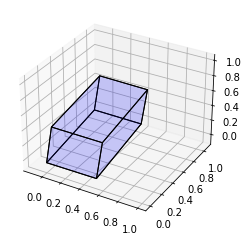

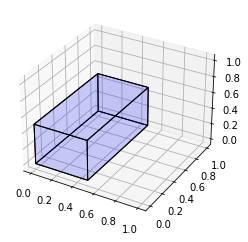

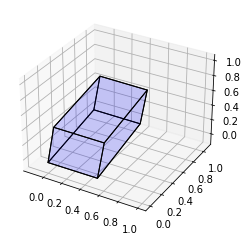

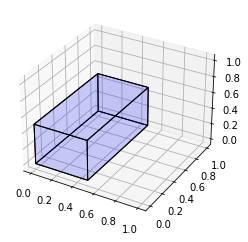

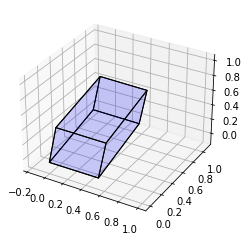

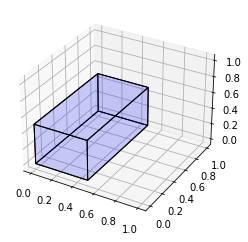

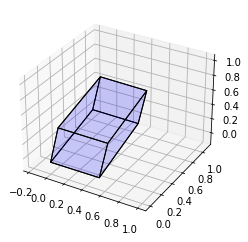

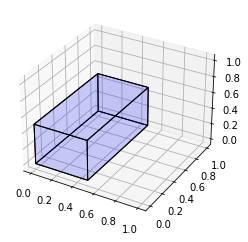

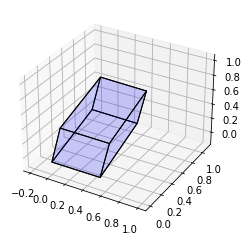

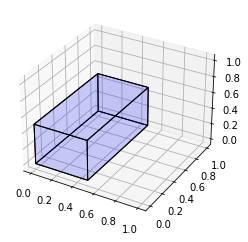

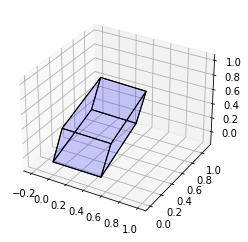

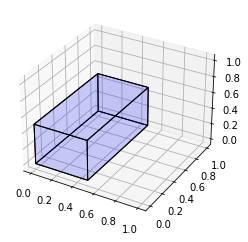

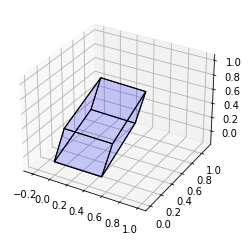

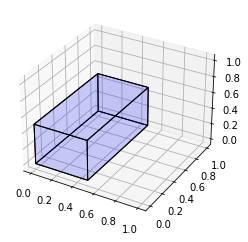

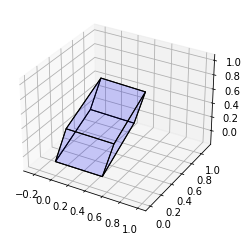

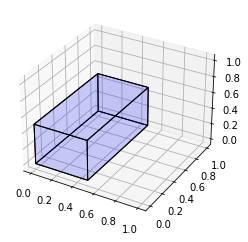

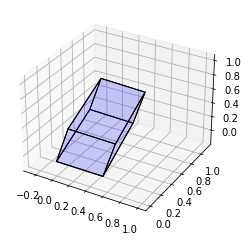

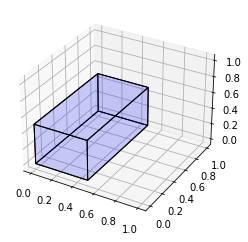

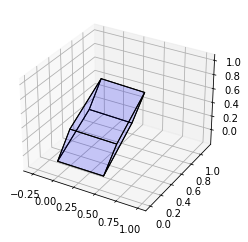

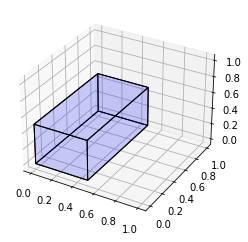

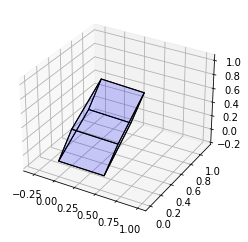

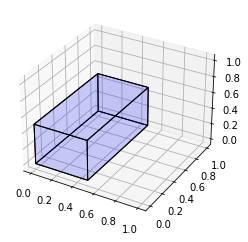

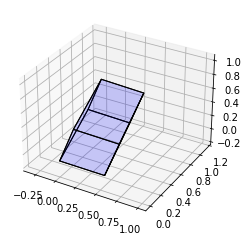

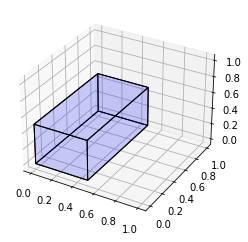

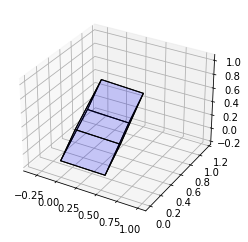

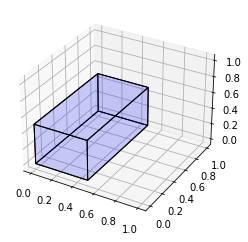

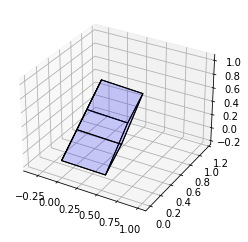

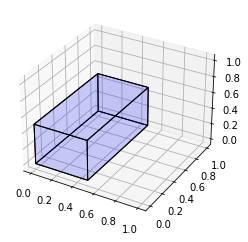

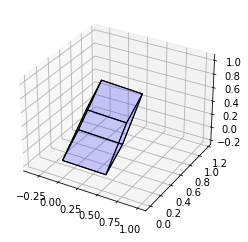

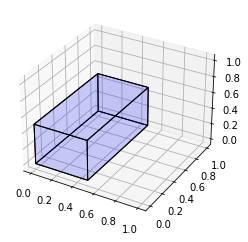

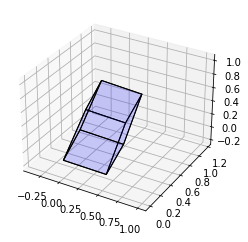

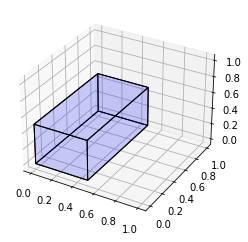

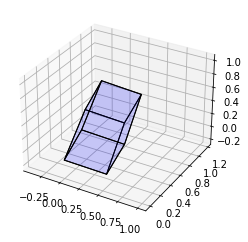

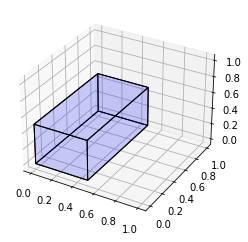

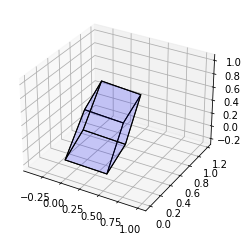

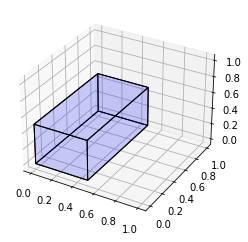

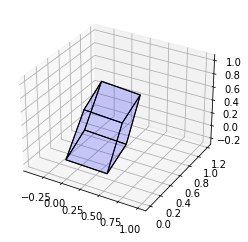

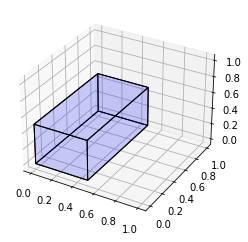

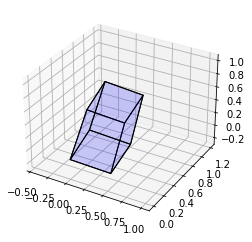

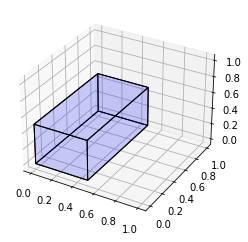

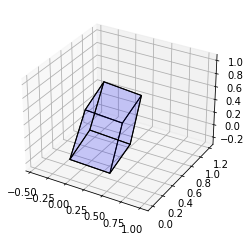

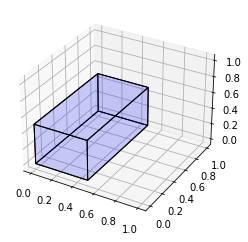

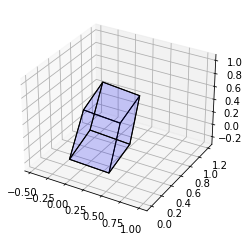

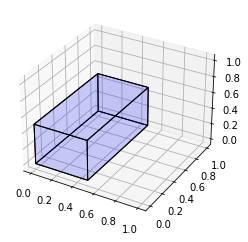

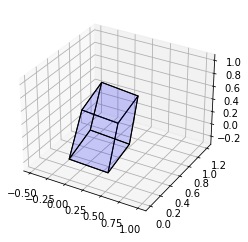

Error in callback <function flush_figures at 0x7fe7105d1af0> (for post_execute):


KeyboardInterrupt: 

In [19]:
for i in range(0,361):
    
    theta_roll = np.radians(i)

    c_roll = np.cos(theta_roll)
    s_roll = np.sin(theta_roll)
    # Define roll rotation matrix
    R3roll = np.zeros((3,3))
    R3roll[0] = [1,0,0]
    R3roll[1] = [0,c_roll,-s_roll]
    R3roll[2] = [0,s_roll,c_roll]


    theta_pitch = np.radians(i)

    c_pitch = np.cos(theta_pitch)
    s_pitch = np.sin(theta_pitch)
    # Define pitch rotation matrix
    R3pitch = np.zeros((3,3))
    R3pitch[0] = [c_pitch,0,s_pitch]
    R3pitch[1] = [0,1,0]
    R3pitch[2] = [-s_pitch,0,c_pitch]

    theta_yaw = np.radians(i)

    c_yaw = np.cos(theta_yaw)
    s_yaw = np.sin(theta_yaw)

    # Define yaw rotation matrix
    R3yaw = np.zeros((3,3))
    R3yaw[0] = [c_yaw,-s_yaw,0]
    R3yaw[1] = [s_yaw,c_yaw,0]
    R3yaw[2] = [0,0,1]

    R3 = np.matmul(R3yaw,R3pitch,R3roll)




    cube_definition = [
        (0,0,0), (0,1,0), (0.5,0,0), (0,0,0.5)
    ]

    cornerlist = []
    rot_cube_def = np.zeros((4,3))
    for i in range(0,len(cube_definition)):
        corner = np.array(cube_definition[i])

        rotated_corner = np.matmul(R3,corner)
        rot_cube_def[i][0] = rotated_corner[0]
        rot_cube_def[i][1] = rotated_corner[1]
        rot_cube_def[i][2] = rotated_corner[2]

        cornerlist.append((rotated_corner[0],rotated_corner[1],rotated_corner[2]))


    try:
        plot_cube(cube_definition)
    except NotImplementedError:
        pass

    try:
        plot_cube(cornerlist)
        plt.savefig('testrotate{}.png'.format(i))
    except NotImplementedError:
        pass


    # check to see if volume is retained with transformation
    length = np.sqrt((cube_definition[0][0] - cube_definition[1][0])**2 + (cube_definition[0][1] - cube_definition[1][1])**2 + (cube_definition[0][2] - cube_definition[1][2])**2)
    width = np.sqrt((cube_definition[0][0] - cube_definition[2][0])**2 + (cube_definition[0][1] - cube_definition[2][1])**2 + (cube_definition[0][2] - cube_definition[2][2])**2)
    height = np.sqrt((cube_definition[0][0] - cube_definition[3][0])**2 + (cube_definition[0][1] - cube_definition[3][1])**2 + (cube_definition[0][2] - cube_definition[3][2])**2)
    vol_1 = length * width * height

    length2 = np.sqrt((cornerlist[0][0] - cornerlist[1][0])**2 + (cornerlist[0][1] - cornerlist[1][1])**2 + (cornerlist[0][2] - cornerlist[1][2])**2)
    width2 = np.sqrt((cornerlist[0][0] - cornerlist[2][0])**2 + (cornerlist[0][1] - cornerlist[2][1])**2 + (cornerlist[0][2] - cornerlist[2][2])**2)
    height2 = np.sqrt((cornerlist[0][0] - cornerlist[3][0])**2 + (cornerlist[0][1] - cornerlist[3][1])**2 + (cornerlist[0][2] - cornerlist[3][2])**2)
    vol_2 = length2 * width2 * height2

    print('dimensions of original cube: length: {}, width: {}, height: {}, volume: {}'.format(length,width,height,vol_1))
    print('dimensions of rotated cube: length: {}, width: {}, height: {}, volume: {}'.format(length2,width2,height2,vol_2))
    #cube_definition, cornerlist